## Imports

In [1]:
from constants import TRAIN_FC_FLUXES_PATH, \
                      TRAIN_FC_AMP_PHASE_PATH, \
                      VALIDATION_FC_FLUXES_PATH, \
                      VALIDATION_FC_AMP_PHASE_PATH

from data_utils import load_numpy_data
                    
from plot_utils import plot_map, \
                       plot_model_history, \
                       plot_fully_connected_amp_phase_prediction

from modeling_utils import create_fully_connected_architecture_for_amplitude_and_phase_reconstruction, \
                           compile_model, \
                           train_model, \
                           train_model_with_generator, \
                           store_model

from configurations import SimpleFCModel as ModelConfig

2024-02-06 15:39:16.429132: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-06 15:39:16.479032: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 15:39:16.479067: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 15:39:16.480465: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-06 15:39:16.489169: I tensorflow/core/platform/cpu_feature_guar

## Load data

In the first place, define the data paths

In [2]:
train_fluxes_array = load_numpy_data(f"{TRAIN_FC_FLUXES_PATH}00.npy")
validation_fluxes_array = load_numpy_data(VALIDATION_FC_FLUXES_PATH)

train_amp_phase_array = load_numpy_data(f"{TRAIN_FC_AMP_PHASE_PATH}00.npy")
validation_amp_phase_array = load_numpy_data(VALIDATION_FC_AMP_PHASE_PATH)

In [3]:
validation_amp_phase_array.shape

(10000, 2, 96, 96)

## Define configuration

In [4]:
model_configuration = ModelConfig()
print(model_configuration.get_description())


	=== FCBNDRL170000 ===
	*ARCHITECTURE HYPERPARAMETERS:
		-Fully Connected
		-Input shape: 1320
		-Output shape: (2, 96, 96)
		-Hidden layers: [2000, 2000, 2000, 2000]
		-Regularizer: None
		-Hidden Layers Activation: relu
		-Output Layer Activation: linear
		-Batch Normalization: True
		-Dropout: True, 0.2
	
	*COMPILATION HYPERPARAMETERS:
		-Optimizer: ADAM lr=0.0001, beta_1=0.9, beta_2=0.999
		-Loss Function: MSE
		-Metric: MSE
	
	* TRAINING HYPERPARAMETERS:
		-Epochs: 200
		-Batch size: 64
		-Callbacks: 
			-ReduceLROnPlateau: MSE 15 x0.1
			-Early Stop: MSE 50
	


2024-02-06 15:39:18.925588: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-06 15:39:19.070667: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-06 15:39:19.071221: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

## Instantiate model

In [5]:
model = create_fully_connected_architecture_for_amplitude_and_phase_reconstruction(
    *model_configuration.unpack_architecture_hyperparameters()
)


Model: "FCBNDRL170000"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2000)              2640000   
                                                                 
 batch_normalization (Batch  (None, 2000)              8000      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 2000)              0         
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 2000)              4000000   
                                                                 
 batch_normalization_1 (Bat  (None, 2000)              8000      
 chNormalization)                                    

## Compile model

In [6]:
compile_model(
    model,
    *model_configuration.unpack_compilation_hyperparameters()
)

## Train model

In [7]:
validation_amp_phase_array[0].shape

(2, 96, 96)

In [8]:
#history = train_model(model, 
#                      train_fluxes_array, 
#                      train_amp_phase_array, 
#                      validation_fluxes_array, 
#                      validation_amp_phase_array,
#                      *model_configuration.unpack_training_hyperparameters()
#                     )


In [9]:
history = train_model_with_generator(
    model,
    TRAIN_FC_FLUXES_PATH,
    TRAIN_FC_AMP_PHASE_PATH,
    validation_fluxes_array,
    validation_amp_phase_array,
    *model_configuration.unpack_training_hyperparameters(),
    n_samples=70000
)

Epoch 1/200


2024-02-06 15:39:22.998871: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-06 15:39:25.359383: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f29a24d9a50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-06 15:39:25.359411: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-02-06 15:39:25.365694: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-06 15:39:25.385961: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1707194365.529956   94537 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1094/1094 [==============================] - 43s 33ms/step - loss: 4.8975 - mean_squared_error: 0.5364 - val_loss: 0.7545 - val_mean_squared_error: 0.6360 - lr: 1.0000e-04
Epoch 2/200
1094/1094 [==============================] - 33s 30ms/step - loss: 0.6517 - mean_squared_error: 0.5183 - val_loss: 0.6847 - val_mean_squared_error: 0.6356 - lr: 1.0000e-04
Epoch 3/200
1094/1094 [==============================] - 32s 30ms/step - loss: 0.6171 - mean_squared_error: 0.5141 - val_loss: 0.6726 - val_mean_squared_error: 0.6302 - lr: 1.0000e-04
Epoch 4/200
1094/1094 [==============================] - 33s 30ms/step - loss: 0.6074 - mean_squared_error: 0.5115 - val_loss: 0.6743 - val_mean_squared_error: 0.6315 - lr: 1.0000e-04
Epoch 5/200
1094/1094 [==============================] - 34s 31ms/step - loss: 0.6014 - mean_squared_error: 0.5092 - val_loss: 0.6855 - val_mean_squared_error: 0.6425 - lr: 1.0000e-04
Epoch 6/200
1094/1094 [==============================] - 36s 33ms/step - loss: 0.5947 - mean

## Results

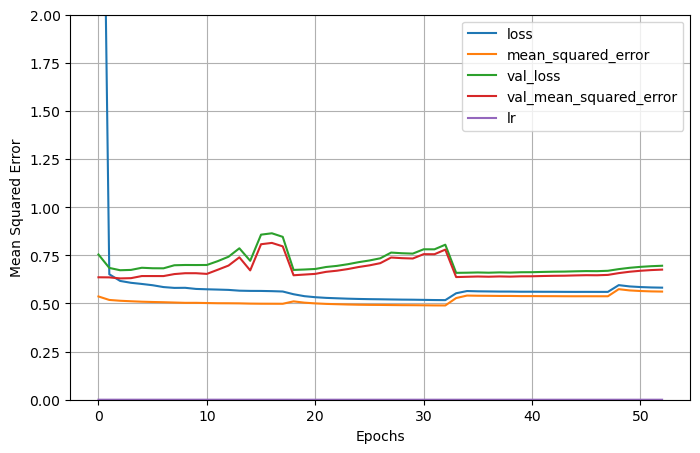

In [10]:
plot_model_history(history)

1/1 [==============================] - 0s 365ms/step


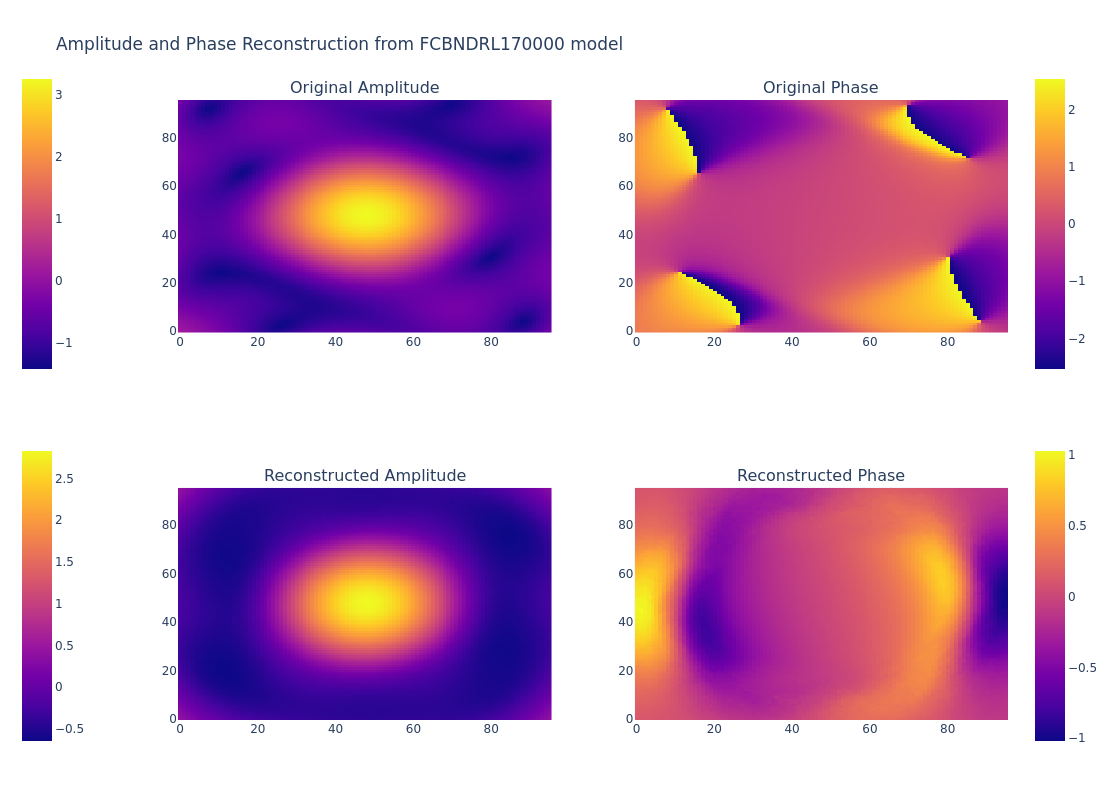

In [11]:
n = 106
plot_fully_connected_amp_phase_prediction(
    model,
    validation_fluxes_array[n],
    validation_amp_phase_array[n][0],
    validation_amp_phase_array[n][1]
    )

1/1 [==============================] - 0s 59ms/step


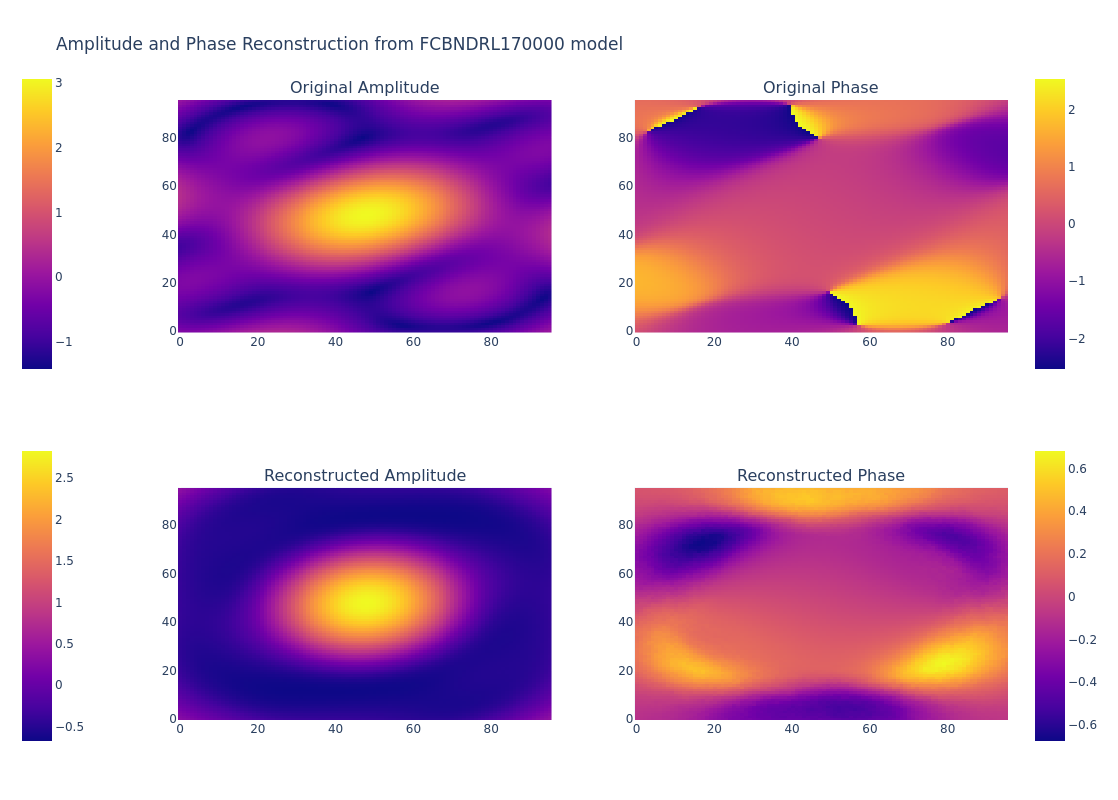

In [12]:
n = 106
plot_fully_connected_amp_phase_prediction(
    model,
    train_fluxes_array[n],
    train_amp_phase_array[n][0],
    train_amp_phase_array[n][1]
    )

In [13]:
store_model(model,
            model.name,
            model_configuration.get_description(),
            history.history['mean_squared_error'][-1],
            history.history['val_mean_squared_error'][-1])